# Pymaceuticals Inc.
---

### Analysis

- There are 248 mice in the study.
- Capomulin and Ramicane have the smallest tumor volumes through all measurements (mean, median, variance, standard deviation, and standard error).
- The most timepoints were observed with Capumulin and Ramicane.
- Mice were split pretty evenly between male and female mice.
- In the treatments measured, only Infubinol had statistical outliers.
- Of the two random mice slected to plot, their tumor volume spiked between days 15-20 and gradually fell until days 35-40.
- Mice with a higher weight tend to have a larger volume of tumor.  The correlation is fairly high between the two at 84%.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mice = merged_df["Mouse ID"].nunique()
print("Number of unique mice:", num_of_mice)

Number of unique mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

print("Duplicate mice based on Mouse ID and Timepoint:")
duplicate_mice

Duplicate mice based on Mouse ID and Timepoint:


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice = merged_df.loc[merged_df["Mouse ID"]=="g989"]

print("All data for the duplicate Mouse IDs")
all_mice

All data for the duplicate Mouse IDs


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df=merged_df[merged_df["Mouse ID"].isin(duplicate_mice)==False]

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(merged_df["Mouse ID"].unique())

print("number of mice in the clean DataFrame:", num_mice)

number of mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
merged_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_df = merged_df.groupby("Drug Regimen")

mean_tumor_volume = regimen_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = regimen_df["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = regimen_df["Tumor Volume (mm3)"].std()
sem_tumor_volume = regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean_tumor_volume="mean",
    median_tumor_volume="median",
    variance_tumor_volume="var",
    std_dev_tumor_volume="std",
    sem_tumor_volume="sem"
)

summary_df.reset_index(inplace=True)
summary_df.columns = ["Drug Regimen", "mean", "median", "var", "std", "sem"]

summary_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

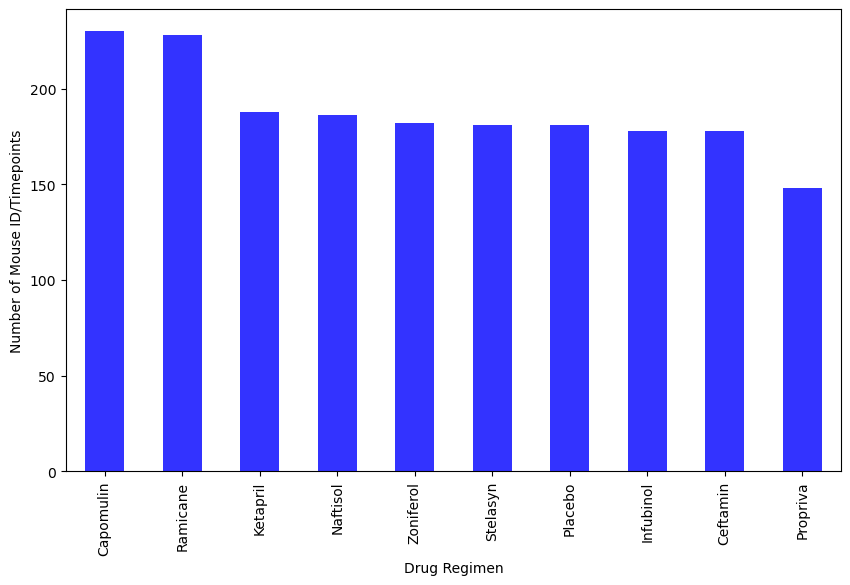

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merged_df["Drug Regimen"].value_counts()

plt.figure(figsize=(10,6))
drug_counts.plot(kind="bar", color="blue", alpha=0.80)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

plt.show()

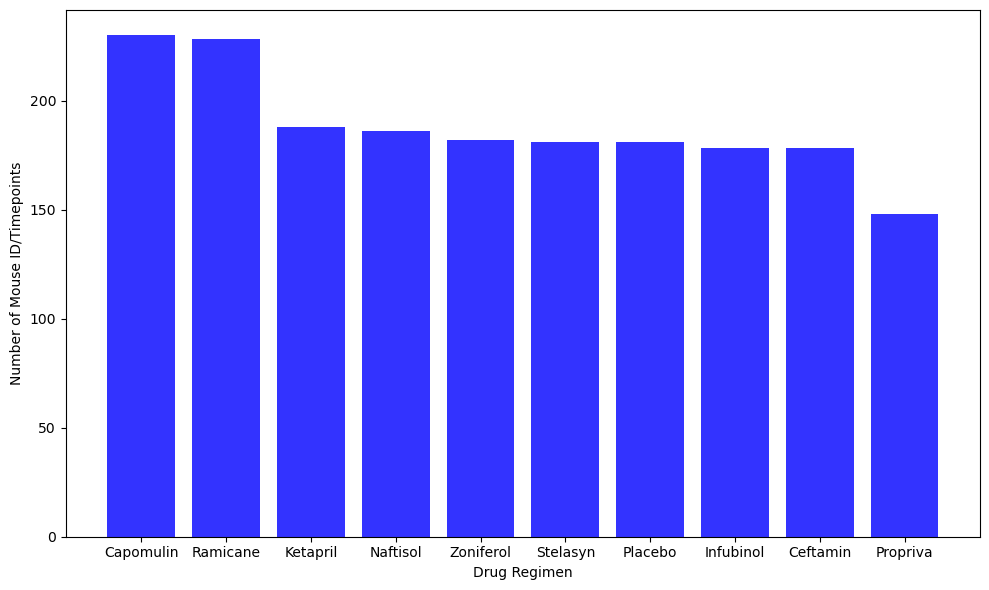

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(drug_counts.index, drug_counts.values, color="blue", alpha=0.80)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

plt.tight_layout()
plt.show()

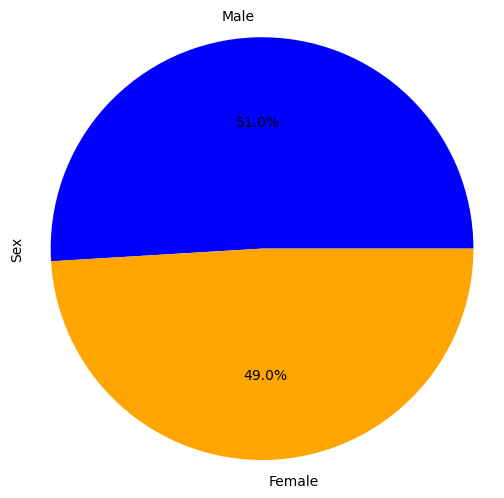

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merged_df["Sex"].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", colors=["blue","orange"],startangle=0)
plt.axis("equal")
plt.show()

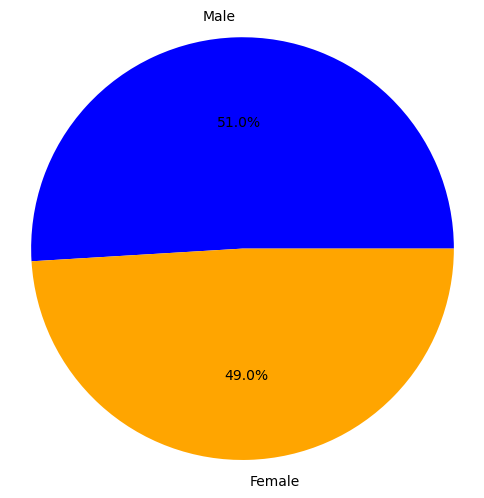

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts=merged_df["Sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "orange"], startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merged_df.sort_values(by=["Mouse ID", "Timepoint"], ascending=True, inplace=True)
last_timepoints = merged_df.groupby("Mouse ID")["Timepoint"].max()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = pd.merge(last_timepoints, merged_df, on=["Mouse ID", "Timepoint"])

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
desired_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(desired_regimens)]

final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for treatment in treatments:
    tumor_vol = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    
    # Determine outliers using upper and lower bounds
    print(f"Treatment: {treatment}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}")
    print("")

Treatment: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



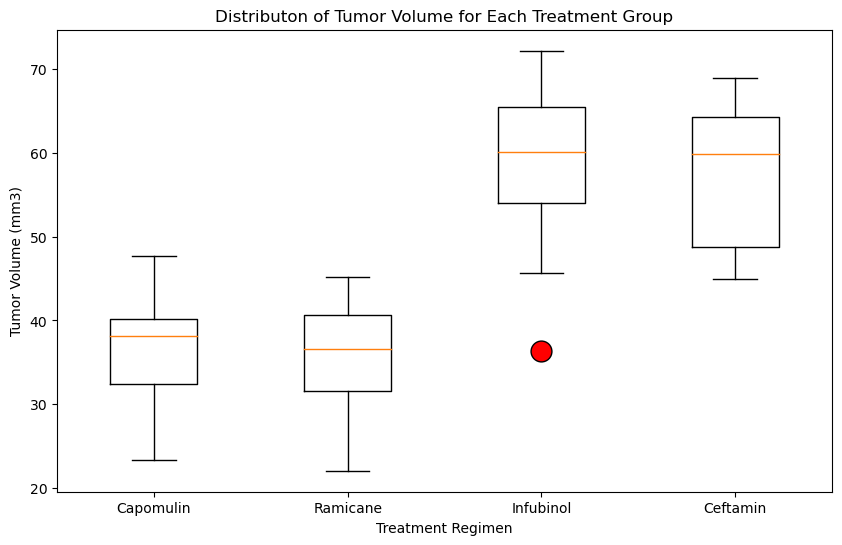

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

outlier_props = dict(markerfacecolor='red', marker='o', markersize=15)

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=outlier_props)
plt.title("Distributon of Tumor Volume for Each Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")

plt.show()

## Line and Scatter Plots

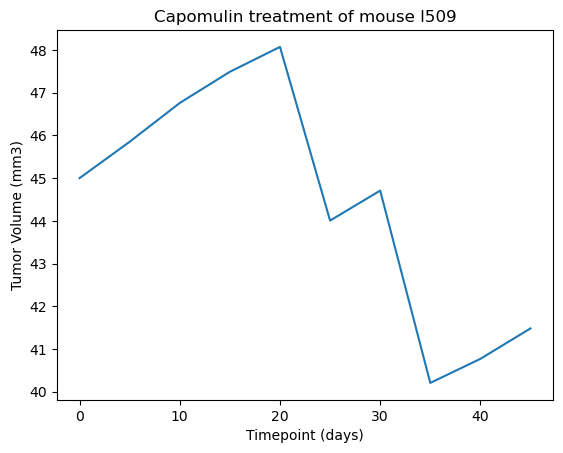

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = merged_df[merged_df["Drug Regimen"]== "Capomulin"]
capomulin = capomulin.reset_index(drop=True)
Capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="l509"]

plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"])

plt.title(f"Capomulin treatment of mouse l509")
plt.ylabel(f"Tumor Volume (mm3)")
plt.xlabel(f"Timepoint (days)")
plt.show()

In [18]:
unique_mouse_ids = final_tumor_volume_df["Mouse ID"].unique()
print(unique_mouse_ids)

['a203' 'a251' 'a275' 'a411' 'a444' 'a520' 'a577' 'a644' 'a685' 'b128'
 'b447' 'b487' 'b742' 'b759' 'c139' 'c326' 'c458' 'c758' 'c895' 'd251'
 'e476' 'e662' 'f345' 'f436' 'f966' 'g288' 'g316' 'g791' 'h531' 'i177'
 'i334' 'i386' 'i557' 'i738' 'j119' 'j246' 'j296' 'j913' 'j989' 'k210'
 'k403' 'k483' 'k804' 'l471' 'l490' 'l509' 'l558' 'l661' 'l733' 'l897'
 'm546' 'm601' 'm756' 'm957' 'n364' 'n671' 'o287' 'o809' 'o813' 'p438'
 'q132' 'q483' 'q597' 'q610' 'r157' 'r554' 'r811' 'r921' 'r944' 's121'
 's185' 's508' 's710' 't565' 't573' 'u149' 'u153' 'u196' 'u364' 'v339'
 'v719' 'v766' 'v923' 'w150' 'w151' 'w193' 'w584' 'w678' 'w914' 'x226'
 'x401' 'x581' 'x822' 'y163' 'y449' 'y769' 'y793' 'y865' 'z578' 'z581']


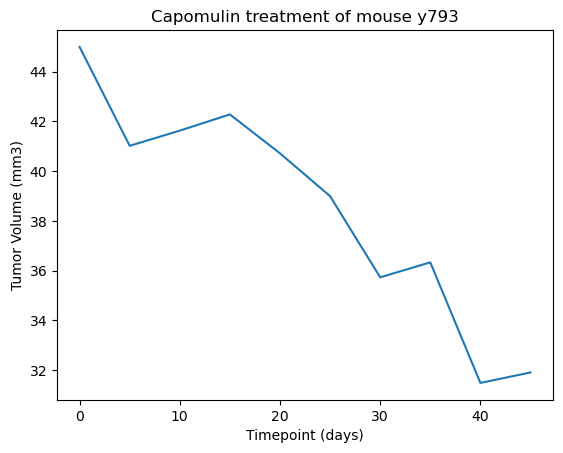

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = merged_df[merged_df["Drug Regimen"]== "Capomulin"]
capomulin = capomulin.reset_index(drop=True)
Capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="y793"]

plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"])

plt.title(f"Capomulin treatment of mouse y793")
plt.ylabel(f"Tumor Volume (mm3)")
plt.xlabel(f"Timepoint (days)")
plt.show()

In [20]:
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
225,y793,25,38.992734,2,Capomulin,Male,17,17
226,y793,30,35.726023,2,Capomulin,Male,17,17
227,y793,35,36.327870,2,Capomulin,Male,17,17
228,y793,40,31.475411,2,Capomulin,Male,17,17


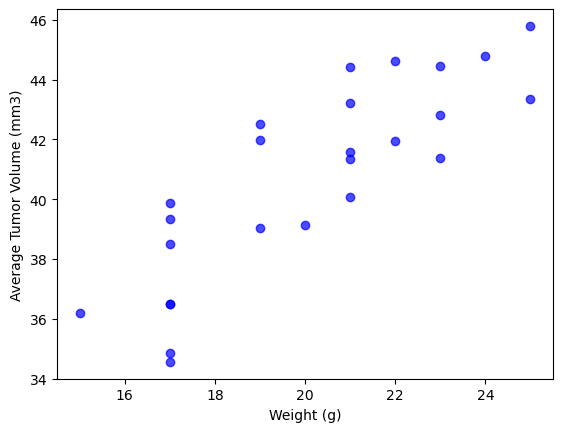

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = merged_df[merged_df["Drug Regimen"]== "Capomulin"]

capomulin_avg= capomulin.groupby("Mouse ID", as_index=False).mean(numeric_only=True)
capomulin_avg_weight_tumor_vol=capomulin_avg[["Tumor Volume (mm3)", "Weight (g)"]]

plt.scatter(capomulin_avg_weight_tumor_vol["Weight (g)"], capomulin_avg_weight_tumor_vol["Tumor Volume (mm3)"], color="blue", alpha=0.7)

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

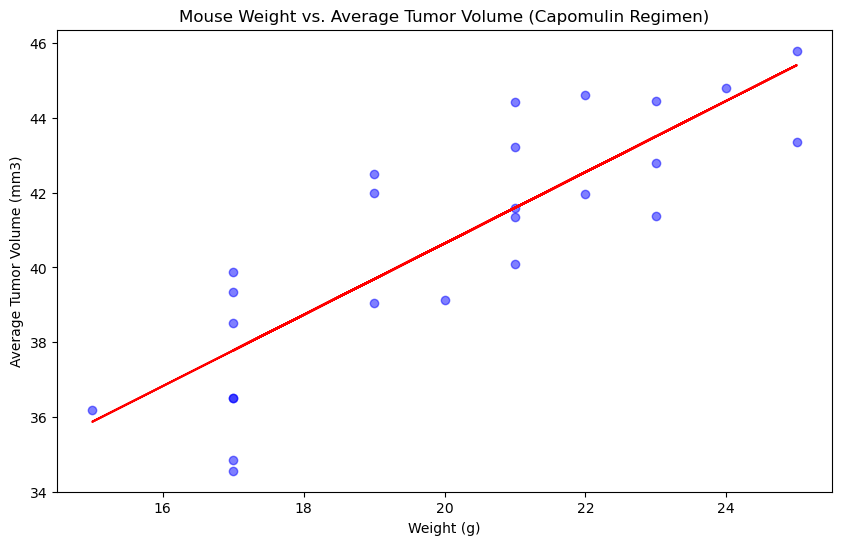

The correlation between mouse weight and the average tumor volume is: 0.84


In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

correlation_coefficient = capomulin_avg_weight_tumor_vol.corr().iloc[0, 1]

(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_avg_weight_tumor_vol["Weight (g)"], capomulin_avg_weight_tumor_vol["Tumor Volume (mm3)"])

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_weight_tumor_vol["Weight (g)"], capomulin_avg_weight_tumor_vol["Tumor Volume (mm3)"], color="blue", alpha=0.5)

regression_value = slope * capomulin_avg_weight_tumor_vol["Weight (g)"] + intercept
plt.plot(capomulin_avg_weight_tumor_vol["Weight (g)"], regression_value, color="red", label="Linear Regression")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

correlation_coefficient_round= round(correlation_coefficient,2)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient_round}")
